# Classification Test 3


- S&P500의 505개 주식 중, 2010년 부터 데이터를 얻을 수 있었던 453개 주식의 수익률을 가지고 개별 기업의 주가 수익률의 방향을 예측해보는 실험을 해보았다.
- 연구의 목적: Classification model 비교
- PCA-SVM, Random Forest, Gaussian Naive Bayesian, Decision Tree, Adaboost, Gradient Boost, M
XGboost, KNN, MPC

In [0]:
import numpy as np
import pandas as pd
!pip install -q yfinance
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

## Data

In [2]:
table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
tickers = table['Symbol'].tolist()
print (tickers)

['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'ANET', 'AJG', 'AIZ', 'ATO', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BHGE', 'BLL', 'BAC', 'BK', 'BAX', 'BBT', 'BDX', 'BRK.B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BF.B', 'CHRW', 'COG', 'CDNS', 'CPB', 'COF', 'CPRI', 'CAH', 'KMX', 'CCL', 'CAT', 'CBOE', 'CBRE', 'CBS', 'CE', 'CELG', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'CTVA', 'COST', 'C

In [95]:
data = yf.download(tickers, start='2009-08-07',end='2019-08-07')

[**********************52%                       ]  261 of 505 downloaded

Exception in thread Thread-1280:
Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.6/dist-packages/multitasking/__init__.py", line 102, in _run_via_pool
    return callee(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/yfinance/__init__.py", line 514, in _download_one_threaded
    period, interval, prepost, proxy)
  File "/usr/local/lib/python3.6/dist-packages/yfinance/__init__.py", line 527, in _download_one
    proxy=proxy)
  File "/usr/local/lib/python3.6/dist-packages/yfinance/__init__.py", line 348, in history
    raise ValueError(self.ticker, err_msg)
ValueError: ('BRK.B', 'No data found, symbol may be delisted')



[**********************72%**********             ]  366 of 505 downloaded

Exception in thread Thread-1386:
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/yfinance/__init__.py", line 357, in history
    quotes = self._parse_quotes(data["chart"]["result"][0])
  File "/usr/local/lib/python3.6/dist-packages/yfinance/__init__.py", line 206, in _parse_quotes
    timestamps = data["timestamp"]
KeyError: 'timestamp'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.6/dist-packages/multitasking/__init__.py", line 102, in _run_via_pool
    return callee(*args, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/yfinance/__init__.py", line 514, in _download_one_threaded
    period, interval, prepost, proxy)
  File "/usr/local/lib/python3.6/dist-packages/yfi

[*********************100%***********************]  503 of 505 downloaded


In [96]:
close = data['Adj Close'][1:]
close = close.dropna(axis=0,how='all')
close.dropna(axis=1,inplace=True)
ret = close.pct_change()
ret = ret.dropna()

,A,AAL,AAP,AAPL,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,ADP,ADS,ADSK,AEE,AEP,AES,AFL,AGN,AIG,AIV,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALXN,AMAT,AMD,AME,AMG,AMGN,AMP,AMT,AMZN,ANSS,ANTM,AON,...,UNM,UNP,UPS,URI,USB,UTX,V,VAR,VFC,VIAB,VLO,VNO,VRSN,VRTX,VTR,VZ,WAB,WAT,WBA,WCG,WDC,WEC,WELL,WFC,WHR,WLTW,WM,WMB,WMT,WU,WY,WYNN,XEC,XEL,XLNX,XOM,XRAY,XRX,YUM,ZION
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-08-10,0.004439,-0.045902,-0.019243,-0.004829,-0.001139,0.009589,0.015844,0.007749,-0.012041,0.003855,-0.000448,-0.008065,-0.014031,0.004630,0.003480,-0.005296,0.007201,-0.018377,-0.004302,0.057483,-0.063616,0.003597,-0.005481,-0.001542,-0.011248,0.027641,-0.017143,-0.018843,0.000000,0.000910,-0.005405,-0.008403,-0.024184,0.012341,-0.016177,0.002848,-0.010314,-0.009592,0.009594,-0.006087,...,-0.023810,-0.034361,-0.007227,-0.014371,-0.010133,0.005238,-0.004249,0.005359,-0.025200,0.008946,0.008648,-0.005502,0.006940,-0.009185,-0.008073,-0.005020,-0.008924,0.009360,0.000000,0.016170,-0.005412,0.008796,-0.025443,-0.004032,-0.045699,-0.004078,0.005286,0.018349,0.008632,-0.002199,-0.036286,-0.035202,0.048203,0.003715,0.002950,-0.004125,-0.005505,0.034362,-0.000981,0.051298
2009-08-11,0.002525,-0.051546,-0.018060,-0.011160,-0.001140,-0.010855,0.004199,-0.011534,-0.027422,-0.001920,-0.006720,-0.005807,-0.011129,0.005027,-0.004624,0.001452,-0.039321,-0.017161,0.016975,-0.131678,-0.034565,-0.009409,0.021433,-0.050952,-0.001468,-0.042267,-0.009690,-0.019204,-0.026079,-0.019091,-0.024457,-0.015408,-0.021286,0.025757,-0.045002,-0.003195,-0.010422,-0.015219,-0.010608,0.016147,...,0.006707,0.012318,-0.001004,-0.030377,-0.039871,-0.002039,-0.003556,-0.009094,-0.008226,-0.027586,-0.016368,-0.023859,0.017544,-0.020278,-0.018754,-0.010090,-0.025324,-0.003284,0.000405,-0.005444,0.003498,0.000671,-0.023734,-0.061179,-0.006067,-0.005733,0.004780,-0.027027,0.006483,-0.022043,-0.036545,-0.017201,-0.037214,-0.000740,-0.008824,-0.009073,-0.006513,-0.034347,-0.038310,-0.083133
2009-08-12,0.020151,0.047101,0.008856,0.015211,0.006849,0.052126,-0.015532,0.008133,0.035088,0.003367,-0.018042,0.009346,0.014945,0.030846,-0.004065,0.001933,0.033488,0.046825,-0.007587,0.016190,0.039506,0.032112,0.022782,-0.003796,0.024991,0.095286,0.039139,0.062937,-0.000923,0.033364,0.000000,-0.004695,0.027342,-0.010351,0.032623,0.000000,0.028722,0.037370,0.001340,0.009041,...,0.044821,0.012618,0.016080,0.030075,-0.003367,0.042906,0.003569,0.021519,0.001185,0.004559,-0.007924,0.006022,0.031404,0.005027,0.005049,0.019819,0.020785,0.001745,0.019028,0.005895,0.012006,0.012735,0.001216,0.010541,0.014388,0.001483,0.040438,0.024306,0.014945,0.022539,0.036015,0.073720,0.015185,0.002963,0.023145,0.014331,0.019666,0.008163,0.002043,-0.012484
2009-08-13,0.008642,0.027682,-0.051767,0.018850,0.006803,0.020860,0.006675,0.015082,0.011804,0.022531,0.007809,0.014275,0.054899,-0.021431,0.002915,-0.002412,0.002700,0.009098,-0.003670,-0.012215,0.011876,0.013146,0.007034,-0.009254,-0.005737,-0.049451,-0.013183,0.017982,-0.016174,0.022422,0.025070,0.030660,0.006654,-0.020918,0.015796,0.008191,-0.015821,0.006771,0.026991,-0.000815,...,0.026667,0.012461,-0.007418,0.030414,0.023649,-0.013278,0.003556,0.013321,0.007101,-0.013111,0.007987,-0.004225,0.027463,0.015004,-0.002153,-0.005552,0.005090,0.017608,0.017084,0.039766,-0.009185,0.000000,-0.012141,0.026079,-0.002149,0.000329,0.021033,0.000000,0.027164,0.001470,0.008876,0.022722,0.009519,-0.002954,0.013341,-0.005298,-0.000643,0.002313,-0.003058,0.038589
2009-08-14,-0.022032,-0.016835,-0.002611,-0.009962,-0.006757,-0.042146,0.001206,-0.006220,-0.034699,-0.015002,-0.011395,-0.006847,-0.004480,0.048760,0.002326,0.001451,-0.008977,-0.010518,-0.002149,-0.025806,-0.017606,-0.006920,-0.006403,-0.010440,-0.020555,-0.024085,-0.003817,-0.013356,0.009394,-0.029825,0.002717,-0.008391,-0.035301,-0.000198,-0.010799,-0.012010,-0.012057,-0.013183,-0.011512,-0.008424,...,-0.018069,-0.010989,-0.010962,-0.033058,-0.002200,-0.003309,-0.012757,-0.013452

In [196]:
# y data
h = yf.download('IPL.TO',start='2009-08-07',end='2019-08-07')
h = h[['Adj Close']]
rety = h.pct_change().dropna()

[*********************100%***********************]  1 of 1 downloaded


In [201]:
target = pd.DataFrame({'y':np.where(rety['Adj Close'] >= 0, 1, -1)}, index = rety.index)
target.shape

(2507, 1)

In [0]:
forindex = pd.concat([target,ret],axis=1).dropna()

y = forindex['y']
x = forindex.drop(columns='y')

In [203]:
len(y), len(x)

(2463, 2463)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=33, shuffle=False, test_size=0.2)

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [0]:
from sklearn.model_selection import GridSearchCV

## SVM

In [0]:
from sklearn.svm import SVC

In [211]:
svc = SVC(kernel='rbf', class_weight='balanced')
svc = svc.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
yfit_svc = svc.predict(X_test)

In [213]:
svc_score = accuracy_score(y_test, yfit_svc)
svc_score

0.5618661257606491

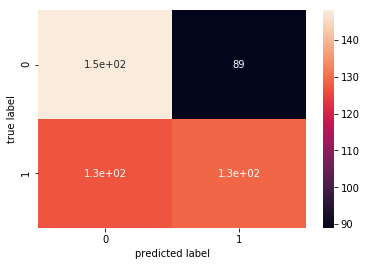

In [214]:
mat = confusion_matrix(y_test, yfit_svc)
sns.heatmap(mat , annot=True)
plt.xlabel('predicted label')
plt.ylabel('true label');

In [215]:
print(classification_report(y_test, yfit_svc))

              precision    recall  f1-score   support

        -1.0       0.54      0.62      0.58       237
         1.0       0.59      0.50      0.54       256

    accuracy                           0.56       493
   macro avg       0.56      0.56      0.56       493
weighted avg       0.57      0.56      0.56       493



## PCA-SVM Pipeline

In [0]:
from sklearn.decomposition import PCA 

In [0]:
pca = PCA().fit(ret)

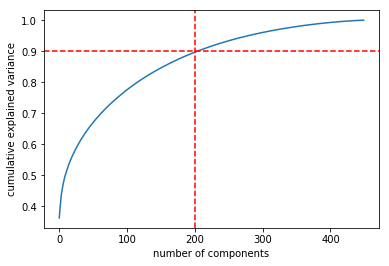

In [218]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(0.90, c='r', ls='--' )
plt.axvline(200, c='r', ls='--' )

In [0]:

from sklearn.pipeline import make_pipeline

In [0]:
pca = PCA(n_components=200, whiten=True, random_state=33)

model = make_pipeline(pca, svc)

In [221]:
pipe = model.fit(X_train,y_train)
yfit_ps = pipe.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [222]:
pca_svm_score = accuracy_score(y_test, yfit_ps)
pca_svm_score

0.5740365111561866

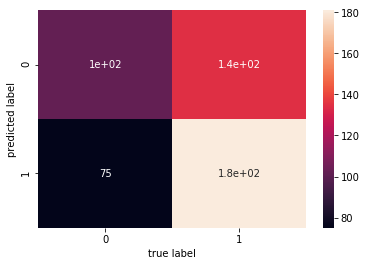

In [223]:
mat = confusion_matrix(y_test, yfit_ps)
sns.heatmap(mat , annot=True)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [224]:
print(classification_report(y_test, yfit_ps))

              precision    recall  f1-score   support

        -1.0       0.58      0.43      0.49       237
         1.0       0.57      0.71      0.63       256

    accuracy                           0.57       493
   macro avg       0.57      0.57      0.56       493
weighted avg       0.57      0.57      0.57       493



## Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [226]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train )

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [227]:
param_grid2 = {'max_depth':[4,5,6,7]}
grid2 = GridSearchCV(clf_rf, param_grid2)
rf_best = grid2.fit(X_train,y_train)
yfit_rf_best = rf_best.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [228]:
#Gridsearch
rf_score = accuracy_score(y_test, yfit_rf_best)
rf_score

0.6085192697768763

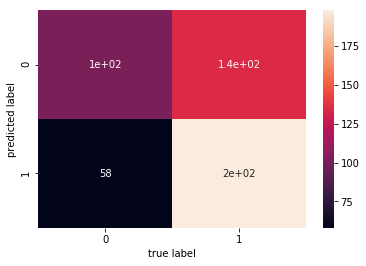

In [229]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, yfit_rf_best)
sns.heatmap(mat , annot=True)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [230]:
print(classification_report(y_test, yfit_rf_best))

              precision    recall  f1-score   support

        -1.0       0.64      0.43      0.51       237
         1.0       0.59      0.77      0.67       256

    accuracy                           0.61       493
   macro avg       0.62      0.60      0.59       493
weighted avg       0.62      0.61      0.60       493



## Gaussian Naive Bayesian

In [0]:
from sklearn.naive_bayes import GaussianNB
modelgnb = GaussianNB()
modelgnb.fit(X_train, y_train);
yfit_gnb = modelgnb.predict(X_test)

In [232]:

gnb_score = accuracy_score(y_test, yfit_gnb)
gnb_score

0.5983772819472617

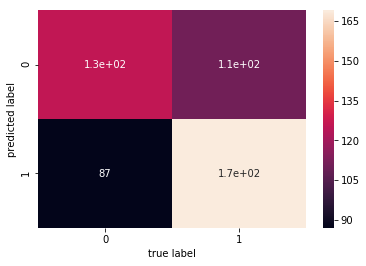

In [233]:
mat = confusion_matrix(y_test, yfit_gnb)
sns.heatmap(mat , annot=True)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [234]:
print(classification_report(y_test, yfit_gnb))

              precision    recall  f1-score   support

        -1.0       0.59      0.53      0.56       237
         1.0       0.60      0.66      0.63       256

    accuracy                           0.60       493
   macro avg       0.60      0.60      0.60       493
weighted avg       0.60      0.60      0.60       493



## Boosting

## Ada-boosting

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(),n_estimators=50,  learning_rate=0.1)
abc.fit(X_train, y_train)
yfit_abc = abc.predict(X_test)

In [236]:

abc_score = accuracy_score(y_test, yfit_abc)
abc_score

0.5618661257606491

Text(33.0, 0.5, 'predicted label')

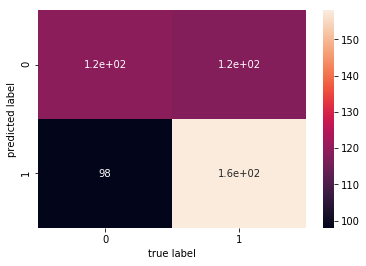

In [237]:
mat = confusion_matrix(y_test, yfit_abc)
sns.heatmap(mat , annot=True)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [238]:
print(classification_report(y_test, yfit_abc))

              precision    recall  f1-score   support

        -1.0       0.55      0.50      0.52       237
         1.0       0.57      0.62      0.59       256

    accuracy                           0.56       493
   macro avg       0.56      0.56      0.56       493
weighted avg       0.56      0.56      0.56       493



## Gradient Boosting

In [239]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier( n_estimators=120, max_depth=2)
gbc.fit(X_train, y_train)
yfit_gbc = gbc.predict(X_test)

accuracy_score(y_test, yfit_gbc)

0.6206896551724138

In [240]:
from sklearn.metrics import mean_squared_error
err = [mean_squared_error(y_test, yhat) for yhat in gbc.staged_predict(X_test)]
idx = np.argmin(err)
idx

8

In [0]:
gbc_best = GradientBoostingClassifier( n_estimators=idx, max_depth=2)
gbc_best.fit(X_train, y_train)
yfit_gbc_best = gbc_best.predict(X_test)

In [243]:
#best hyperparameter
gbc_score = accuracy_score(y_test, yfit_gbc_best)
gbc_score


0.6247464503042597

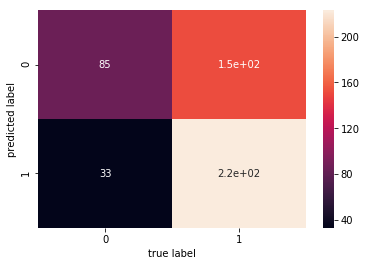

In [244]:
mat = confusion_matrix(y_test, yfit_gbc_best)
sns.heatmap(mat , annot=True)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [245]:
print(classification_report(y_test, yfit_gbc_best))

              precision    recall  f1-score   support

        -1.0       0.72      0.36      0.48       237
         1.0       0.59      0.87      0.71       256

    accuracy                           0.62       493
   macro avg       0.66      0.61      0.59       493
weighted avg       0.66      0.62      0.60       493



## Single Decision Tree Model

In [246]:
params = {'max_depth': [2,3,4,5,6]}
dtc_grid = GridSearchCV(DecisionTreeClassifier(), params, cv=5)
dtc_grid

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': [2, 3, 4, 5, 6]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scor

In [247]:
dtc_grid.fit(X_train, y_train)
dtc_grid.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [248]:

yfit_dtc_best = dtc_grid.best_estimator_.predict(X_test)
tree_score = accuracy_score(yfit_dtc_best, y_test)
tree_score

0.5983772819472617

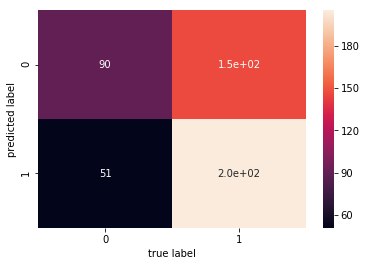

In [249]:
mat = confusion_matrix(y_test, yfit_dtc_best)
sns.heatmap(mat , annot=True)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [250]:
print(classification_report(y_test, yfit_dtc_best))

              precision    recall  f1-score   support

        -1.0       0.64      0.38      0.48       237
         1.0       0.58      0.80      0.67       256

    accuracy                           0.60       493
   macro avg       0.61      0.59      0.58       493
weighted avg       0.61      0.60      0.58       493



## XGBoost

In [0]:
from xgboost import XGBClassifier

In [0]:
xgb = XGBClassifier(n_estimators=100)
xgb = xgb.fit(X_train, y_train)
yfit_xgb = xgb.predict(X_test)

In [253]:
xgb_score = accuracy_score(yfit_xgb, y_test)
xgb_score

0.6308316430020284

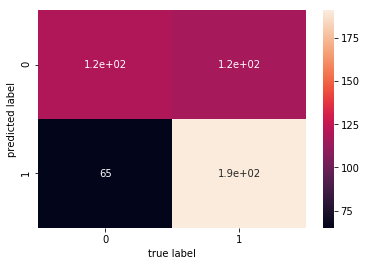

In [254]:
mat = confusion_matrix(y_test, yfit_xgb)
sns.heatmap(mat , annot=True)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [255]:
print(classification_report(y_test, yfit_xgb))

              precision    recall  f1-score   support

        -1.0       0.65      0.51      0.57       237
         1.0       0.62      0.75      0.68       256

    accuracy                           0.63       493
   macro avg       0.63      0.63      0.62       493
weighted avg       0.63      0.63      0.63       493



In [0]:
xgb2 = XGBClassifier(ax_depth=5, learning_rate=0.01, n_estimators=100, gamma=0, 
                        min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005)
xgb2 = xgb2.fit(X_train, y_train)
yfit_xgb_2 = xgb2.predict(X_test)

In [257]:
xgb_score = accuracy_score(y_test,yfit_xgb_2)
xgb_score

0.6389452332657201

## KNN (K-Nearest Neighbors)

In [0]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn = knn.fit(X_train, y_train)
yfit_knn = knn.predict(X_test)

In [259]:
knn_score = accuracy_score(yfit_knn, y_test)
knn_score

0.5963488843813387

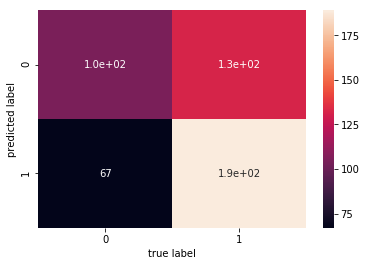

In [260]:
mat = confusion_matrix(y_test, yfit_knn)
sns.heatmap(mat , annot=True)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [261]:
print(classification_report(y_test, yfit_knn))

              precision    recall  f1-score   support

        -1.0       0.61      0.44      0.51       237
         1.0       0.59      0.74      0.66       256

    accuracy                           0.60       493
   macro avg       0.60      0.59      0.58       493
weighted avg       0.60      0.60      0.59       493



## MLP (Multilayer Perceptron)

In [0]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs')
mlp = mlp.fit(X_train, y_train)
yfit_mlp = mlp.predict(X_test)

In [263]:
mlp_score = accuracy_score(yfit_mlp, y_test)
mlp_score

0.5537525354969574

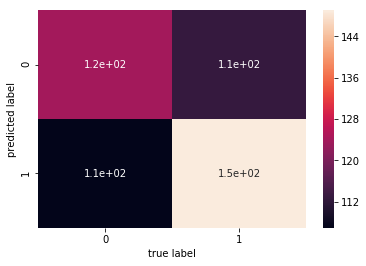

In [264]:
mat = confusion_matrix(y_test, yfit_mlp)
sns.heatmap(mat , annot=True)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [265]:
print(classification_report(y_test, yfit_mlp))

              precision    recall  f1-score   support

        -1.0       0.54      0.52      0.53       237
         1.0       0.57      0.58      0.58       256

    accuracy                           0.55       493
   macro avg       0.55      0.55      0.55       493
weighted avg       0.55      0.55      0.55       493



## Deep Neural Network

In [266]:
# tensorflow 활용
import tensorflow as tf
tf.version

<module 'tensorflow._api.v1.version' from '/usr/local/lib/python3.6/dist-packages/tensorflow/_api/v1/version/__init__.py'>

In [267]:
tf.keras

<module 'tensorflow.python.keras.api._v1.keras' from '/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/api/_v1/keras/__init__.py'>

## accuracy score

In [0]:
accuracy_score=[svc_score, pca_svm_score, gnb_score, tree_score, rf_score, knn_score, abc_score, gbc_score, xgb_score, mlp_score]

In [269]:
index = ['SVM', 'PCA-SVM', 'GNB', 'Decision Tree','Random Forest','KNN','Adaboost','Gradient Boost','XGBoost','MLP']
table = pd.DataFrame(data=accuracy_score, index=index, columns=['accuracy score'])
table

,accuracy score
SVM,0.561866
PCA-SVM,0.574037
GNB,0.598377
Decision Tree,0.598377
Random Forest,0.608519
KNN,0.596349
Adaboost,0.561866
Gradient Boost,0.624746
XGBoost,0.638945
MLP,0.553753


In [270]:
table.sort_values(by='accuracy score',ascending=False)

,accuracy score
XGBoost,0.638945
Gradient Boost,0.624746
Random Forest,0.608519
GNB,0.598377
Decision Tree,0.598377
KNN,0.596349
PCA-SVM,0.574037
SVM,0.561866
Adaboost,0.561866
MLP,0.553753


 # 부록 ( classification report) 
### from https://muthu.co/understanding-the-classification-report-in-sklearn/

what is that?

### Precision: What percent of your predictions were correct?

Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class it is defined as the ratio of true positives to the sum of true and false positives.

- TP – True Positives
- FP – False Positives

* Precision – Accuracy of positive predictions.
* Precision = TP/(TP + FP)

### Recall: What percent of the positive cases did you catch? 

Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.

- FN – False Negatives

- Recall: Fraction of positives that were correctly identified.
- Recall = TP/(TP+FN)

### F1 score: What percent of positive predictions were correct? 

The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

- F1 Score = 2$*$(Recall $*$ Precision) / (Recall + Precision)